In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
tf_keras=tf.contrib.keras

In [4]:
(x_train,y_train),(x_test,y_test)=tf_keras.datasets.mnist.load_data("C:\Users\Farhad\.keras\datasets\mnist.npz")

In [7]:
def plot_10_by_10_images(images):
    # figure size
    fig=plt.figure(figsize=(8,8))
    
    # crop image
    images= [image[3:25,3:25] for image in images]
    
    # plot image grid
    for x in range(10):
        for y in range(10):
            ax=fig.add_subplot(10,10,10*y+x+1)
            ax.matshow(images[10*y+x], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

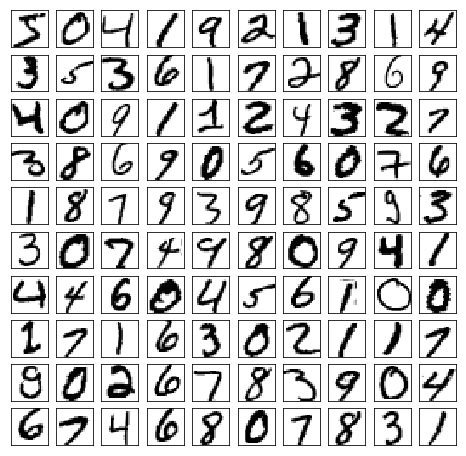

In [9]:
plot_10_by_10_images(x_train[:100])

In [11]:
def preprocess_images((x_train, y_train), (x_test, y_test), num_classes):
    # expand to 4d tensor
    X_train = np.expand_dims(x_train, 3)
    X_test = np.expand_dims(x_test,3)
    
    #normalize images
    X_train = X_train.astype ('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    # binarize target matrix (one-hot vector encoding)
    Y_train = tf_keras.utils.to_categorical(y_train, num_classes)
    Y_test = tf_keras.utils.to_categorical(y_test, num_classes)
    
    print('X_train shape', X_train.shape)
    print('Y_train shape:', Y_train.shape)
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')
    
    return (X_train, Y_train), (X_test, Y_test)

In [14]:
# number of classes
num_class = 10
# preprocess images
(X_train, Y_train), (X_test, Y_test) = preprocess_images((x_train, y_train), (x_test, y_test), num_class)

('X_train shape', (60000L, 28L, 28L, 1L))
('Y_train shape:', (60000L, 10L))
(60000L, 'train samples')
(10000L, 'test samples')


In [16]:
# Hyper-parameter tuning instead of gradient descent optimization with back-propagation
params = {
    "num_classes":10, # number of classes
    "input_shape": (28,28,1), # input image size
    "conv_filters": 16, # number of convolutional feature maps
    "conv_kernel": (3,3), # convolutional feature map size
    "pool_kernel": (2,2), # pooling window size
    "dense_size": 128, # size of fully connect layer
    "dropout": 0.4, #ratio of neurons to drop during training
    "learning_rate": 0.01 # learning rate
}

In [26]:
def simpleCNN(params):
    #TensorFlow default graph
    tf.reset_default_graph()
    
    #input image tensor
    inputs = tf_keras.layers.Input(shape = params["input_shape"])
    
    #concolutional layer
    net = tf_keras.layers.Conv2D(params["conv_filters"], params["conv_kernel"], padding='same', activation=tf.nn.relu)(inputs)
    
    # mxpooling layer
    net = tf_keras.layers.MaxPool2D(params["pool_kernel"])(net)
    
    # flatten/reshape layer
    net = tf_keras.layers.Flatten()(net)
    
    # fully connected layer
    net = tf_keras.layers.Dense(params["dense_size"], activation=tf.nn.relu)(net)
    
    # drpout layer
    net = tf_keras.layers.Dropout(params["dropout"])(net)
    
    # fully connected layer
    outputs = tf_keras.layers.Dense(params["num_classes"], activation= tf.nn.softmax)(net)
    
    # model
    model = tf_keras.models.Model(inputs=inputs, outputs=outputs)
    
    # SGD/optimizer
    optimizer = tf_keras.optimizers.SGD(lr=params["learning_rate"])
    
    # compile the model with loss, optimizer and evaluatio metrics
    model.compile(loss= tf_keras.losses.categorical_crossentropy, optimizer=optimizer, metrics= [tf_keras.metrics.categorical_accuracy])
    
    print(model.summary())
    return model


In [27]:
# visualize the model
model = simpleCNN(params)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

In [28]:
# train neural network
model.fit(x=X_train, y=Y_train, batch_size=64, verbose=1, epochs=6, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 34s 570us/step - loss: 0.8083 - categorical_accuracy: 0.7619 - val_loss: 0.2930 - val_categorical_accuracy: 0.9175
Epoch 2/6
60000/60000 [==============================] - 32s 535us/step - loss: 0.3395 - categorical_accuracy: 0.8995 - val_loss: 0.2200 - val_categorical_accuracy: 0.9370
Epoch 3/6
60000/60000 [==============================] - 33s 554us/step - loss: 0.2776 - categorical_accuracy: 0.9172 - val_loss: 0.1791 - val_categorical_accuracy: 0.9476
Epoch 4/6
60000/60000 [==============================] - 33s 555us/step - loss: 0.2439 - categorical_accuracy: 0.9284 - val_loss: 0.1602 - val_categorical_accuracy: 0.9532
Epoch 5/6
60000/60000 [==============================] - 34s 559us/step - loss: 0.2218 - categorical_accuracy: 0.9346 - val_loss: 0.1449 - val_categorical_accuracy: 0.9582
Epoch 6/6
60000/60000 [==============================] - 33s 545us/step - loss: 0.2037 - c

In [29]:
# Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=1)
print
print('Test score', score[0])
print ('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 191us/step

('Test score', 0.13288594822511077)
('Test accuracy:', 0.9596)


In [31]:
# mke prediction from training model
class_probabilities = model.predict(X_test[:10])

predictions = np.argmax(class_probabilities, axis=1)
print("Predictions: {}".format(predictions))


Predictions: [7 2 1 0 4 1 4 9 6 9]


In [43]:
# plot predictions
def plot_images_together(images, predictions):
    pred_str = "   ".join(map(str,predictions))
    
    fig=plt.figure(figsize=(30, 6))
    images = [image[:, 3:25] for image in images]
    image = np.concatenate(images, axis=1)
    
    ax= fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    
    plt.text(0.5, -0.5,pred_str, fontsize=100, horizontalalignment='center', 
             verticalalignment='center', transform=ax.transAxes, 
             bbox=dict(facecolor='green', alpha=0.4))
    plt.show()

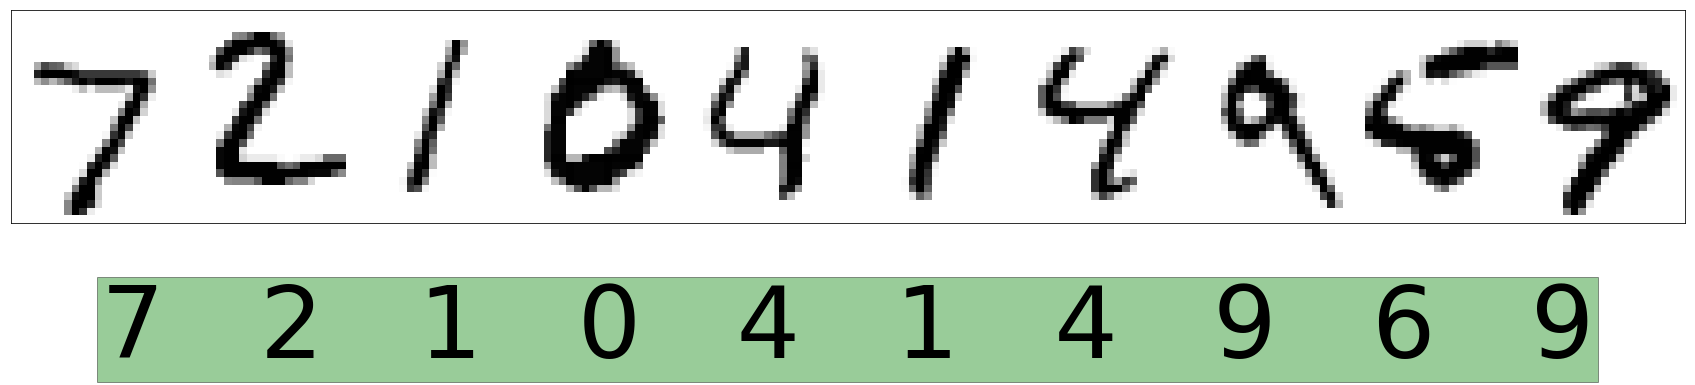

In [44]:
plot_images_together(x_test[:10], predictions)